In [1]:
#Test running time for mvc and sGW solver in Fig2/3/4

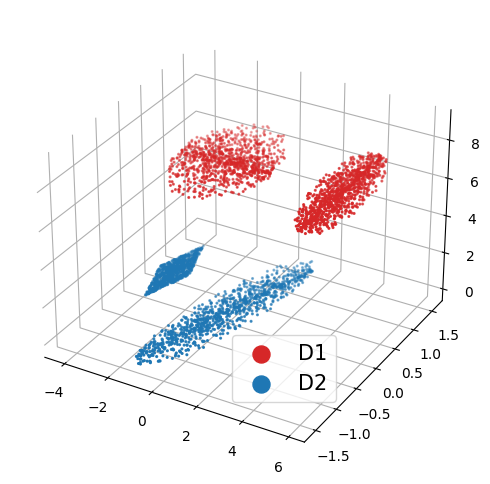

In [5]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp


def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

n1 = 1000
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

C1 = sp.spatial.distance.cdist(x, x)
C2 = sp.spatial.distance.cdist(y, y)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='tab:red', label='D1', s=1.5)  # Change size as needed
ax.scatter(y[:, 0], y[:, 1], color='tab:blue', label='D2', s=1.5)  # Change size as needed
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.legend(fontsize=15,loc=[0.48,0.15],markerscale=10)
plt.savefig('efficienct_data.png', dpi=300, bbox_inches='tight')


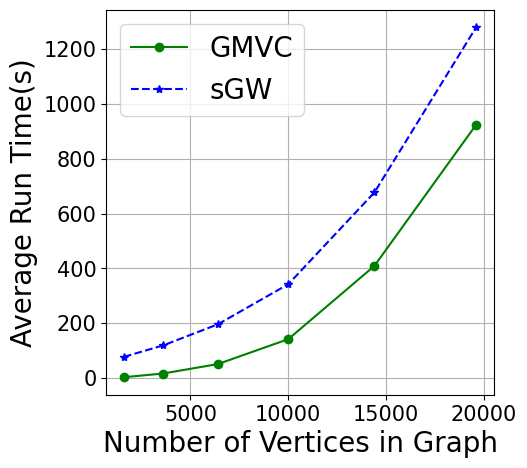

In [6]:
import matplotlib.pyplot as plt

# data by taking n1 = 20, 30, 40, 50, 60, 70 in the previous cell
# run 5 times for each case and take the average running time
vertex_sizes = [1600, 3600, 6400, 10000, 14400, 19600]
times_mvc = [2.6, 16.1, 50.6, 141.5, 408.9, 924.3]
times_sgw = [77, 118.6, 195.7, 342, 677, 1280.1]
# Create the plot
plt.figure(figsize=(5, 5))

# Plotting the line with markers
plt.plot(vertex_sizes, times_mvc, marker='o', linestyle='-', color='green', label='GMVC')
plt.plot(vertex_sizes, times_sgw, marker='*', linestyle='--', color='blue', label='sGW')

# Adding title and labels
#plt.title('Efficiency of GMVC and sGW')
plt.xlabel('Number of Vertices in Graph',fontsize=20)
plt.ylabel('Average Run Time(s)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
# Adding legend
plt.legend(fontsize=20)

# Show grid
plt.grid(True)
plt.savefig('efficiency.png', dpi=300, bbox_inches='tight')

In [4]:
#combine

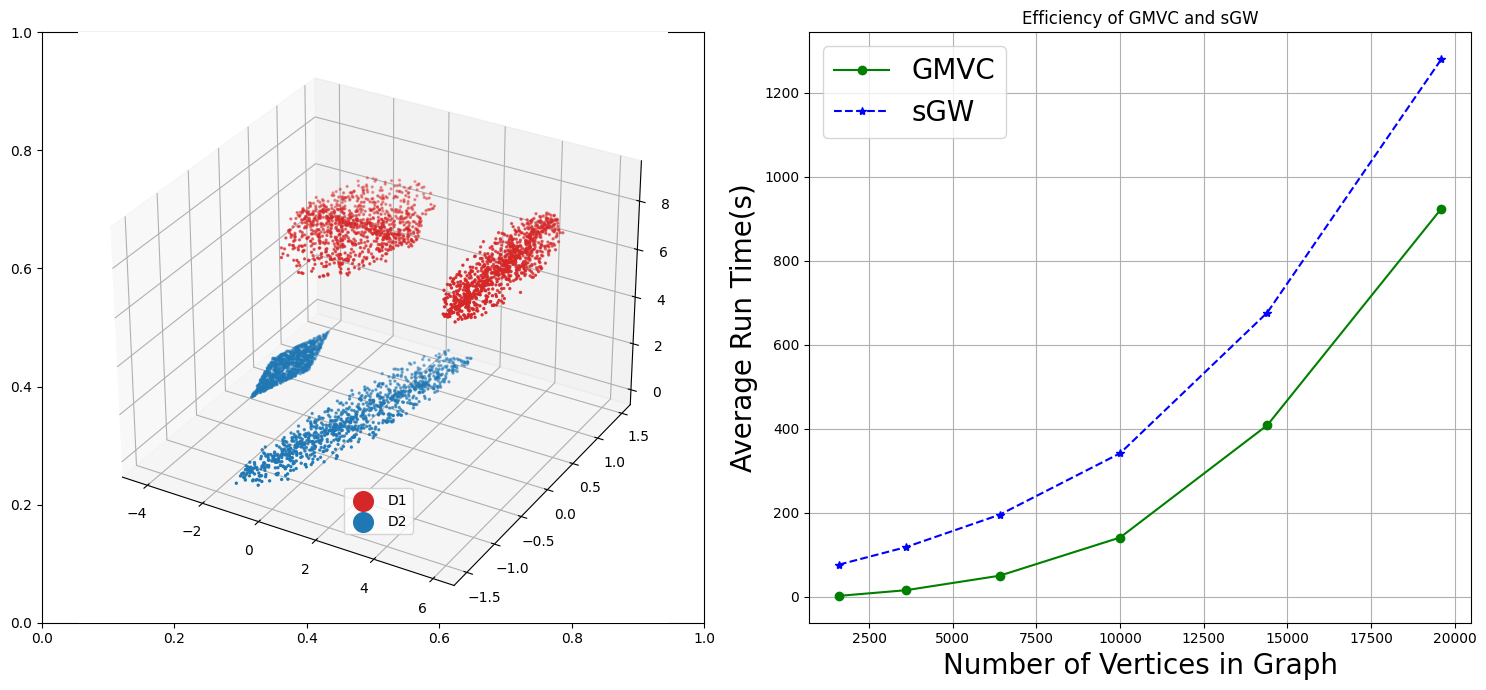

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp

def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

n1 = 1000
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

C1 = sp.spatial.distance.cdist(x, x)
C2 = sp.spatial.distance.cdist(y, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x[:, 0], x[:, 1], x[:, 2], color='tab:red', label='D1', s=2)  # Change size as needed
ax1.scatter(y[:, 0], y[:, 1], color='tab:blue', label='D2', s=2)  # Change size as needed
ax1.legend(fontsize=10, loc=[0.45, 0.15], markerscale=10)
#ax1.set_title('3D Scatter Plot')

# Second subplot
vertex_sizes = [1600, 3600, 6400, 10000, 14400, 19600]
times_mvc = [2.6, 16.1, 50.6, 141.5, 408.9, 924.3]
times_sgw = [77, 118.6, 195.7, 342, 677, 1280.1]
ax2.plot(vertex_sizes, times_mvc, marker='o', linestyle='-', color='green', label='GMVC')
ax2.plot(vertex_sizes, times_sgw, marker='*', linestyle='--', color='blue', label='sGW')
ax2.set_xlabel('Number of Vertices in Graph', fontsize=20)
ax2.set_ylabel('Average Run Time(s)', fontsize=20)
ax2.legend(fontsize=20)
ax2.grid(True)
ax2.set_title('Efficiency of GMVC and sGW')

plt.tight_layout()
plt.savefig('combined_plot.png', dpi=300, bbox_inches='tight')
plt.show()
